> Workshop LabCity
# Processamento de Imagens com Python e OpenCV
## Parte 5: Limiarização e Detecção de Contornos

Limiarização é uma técnica fundamental no processamento de imagens utilizada para separar objetos de interesse em uma imagem, com base nos valores de intensidade dos pixels.

Na limiarização, um valor de limiar (threshold) é definido, e cada pixel da imagem é comparado com esse valor. Se o valor do pixel for maior ou igual ao limiar, ele é alterado para um valor máximo (geralmente 255, branco); caso contrário, é alterado para 0 (preto).

Vamos testar as funções de limiarização com o arquivo `media/gradient.jpg`.

---
## Importando as bibliotecas necessárias

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

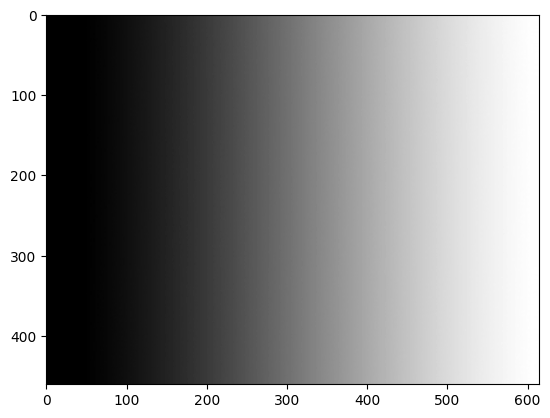

In [2]:
gradiente = cv2.imread("media/gradient.jpg", cv2.IMREAD_GRAYSCALE)
plt.imshow(gradiente, cmap="gray")

---
## Limiarização Simples

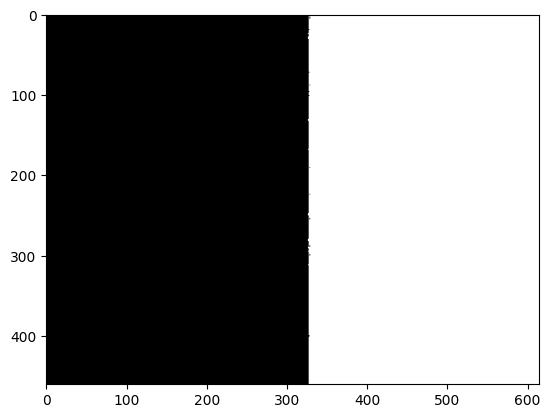

In [3]:
# Selecionar o valor do Limiar
limiar = 127

# Realizar a Limiarização
_, binarizada = cv2.threshold(gradiente, limiar, 255, cv2.THRESH_BINARY)

# Exibir a imagem
plt.imshow(binarizada, cmap="gray")

---
## Limiarização Inversa

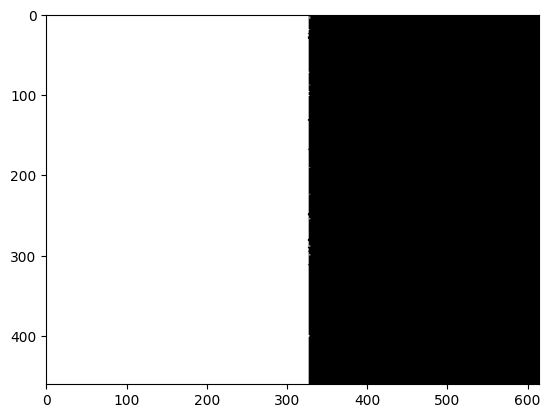

In [4]:
# Selecionar o valor do Limiar
limiar = 127

# Realizar a Limiarização
_, binarizada = cv2.threshold(gradiente, limiar, 255, cv2.THRESH_BINARY_INV)

# Exibir a imagem
plt.imshow(binarizada, cmap="gray")

---
## Testando diferentes valores de limiar nas imagens de exemplo

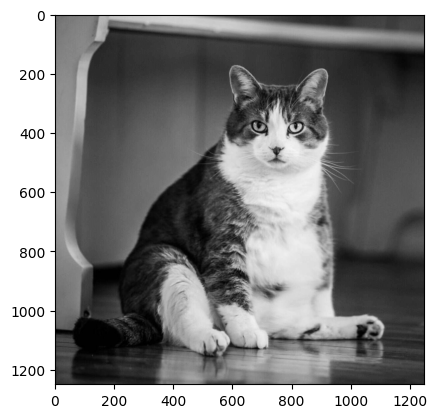

In [5]:
# Carregar o arquivo `media/gatogordo.jpg` em escala de cinza
path = "media/gatogordo.jpg"
imagem = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2GRAY)

# Exibir a imagem
plt.imshow(imagem, cmap="gray")

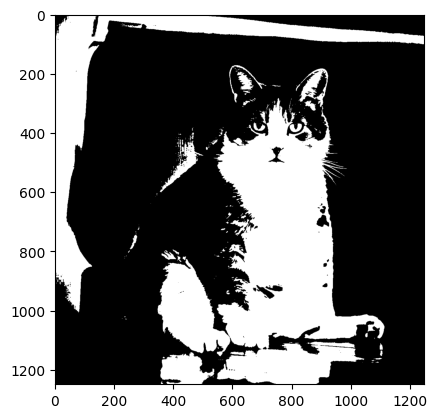

In [6]:
# Testar diferentes valores de limiar
threshold = 115

# Testar diferentes tipos de limiarização
_, binarizada = cv2.threshold(imagem, threshold, 255, cv2.THRESH_BINARY)

# Exibir a imagem
plt.imshow(binarizada, cmap="gray")

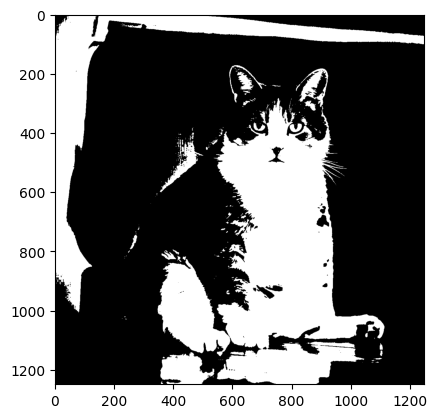

In [7]:
otsu_valor, otsu_thresh = cv2.threshold(
    imagem, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU
)
plt.imshow(otsu_thresh, cmap="gray")

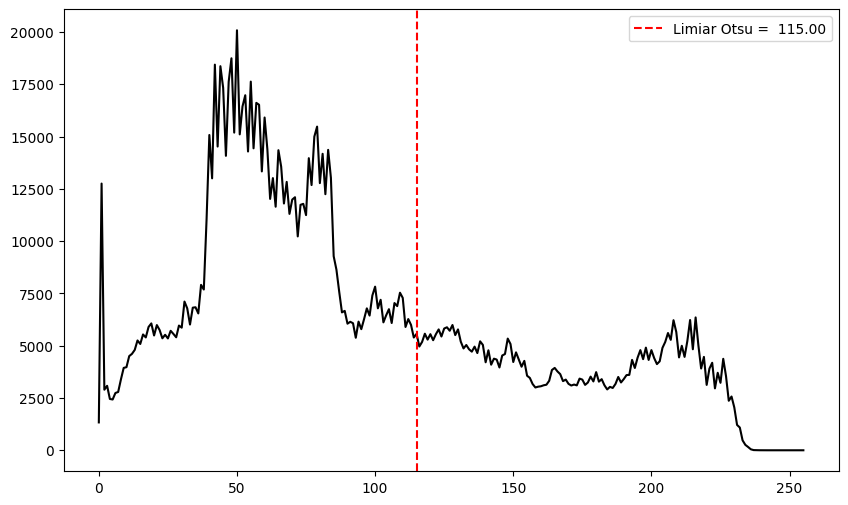

In [8]:
# Calcular o histograma da imagem
hist = cv2.calcHist([imagem], [0], None, [256], [0, 256])

# Plotar o histograma
plt.figure(figsize=(10, 6))
plt.plot(hist, color="black")

# Marcar o valor do limiar Otsu no histograma
plt.axvline(
    x=otsu_valor, color="r", linestyle="--", label=f"Limiar Otsu = {_: .2f}"
)
plt.legend()

# Mostrar o gráfico
plt.show()

---
## Limizarização + Detecção de Contornos

### Mini Projeto: elaborar uma metodologia de visão computacional para realizar a contagem de moedas na imagem `media/moedas.jpg`

Passo-a-passo:
1. Suavizar a imagem para reduzir ruídos
2. Aplicar limiarização para extrair a máscara de segmentação
3. Detectar os contornos
4. Contar o número de contornos encontrados

### Parte 1: Extrair a máscara de segmentação que representa as moedas

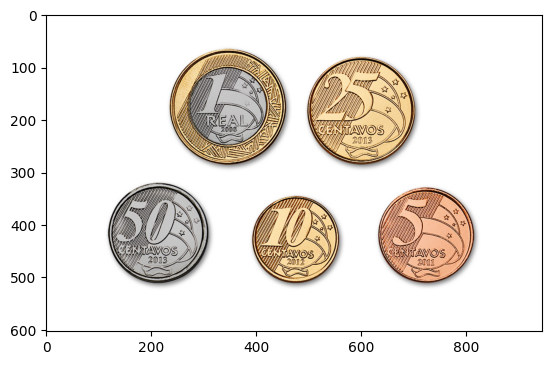

In [9]:
# Carregar o arquivo `media/gatogordo.jpg` em escala de cinza
path = "media/moedas.jpg"
imagem = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB)

# Exibir a imagem
plt.imshow(imagem, cmap="gray")

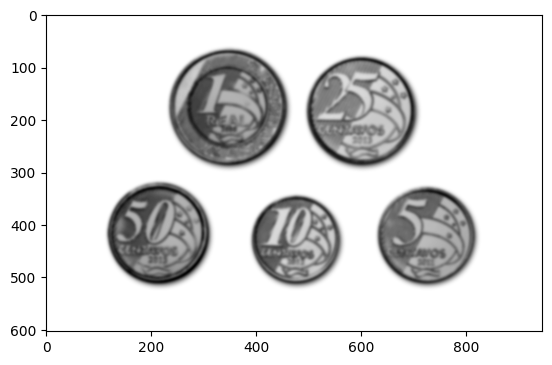

In [10]:
# Converter para escala de cinza
cinza = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2GRAY)

# Passo 1: Aplicar um filtro de suavização
suavizada = cv2.GaussianBlur(cinza, (15, 15), 0)

plt.imshow(suavizada, cmap="gray")

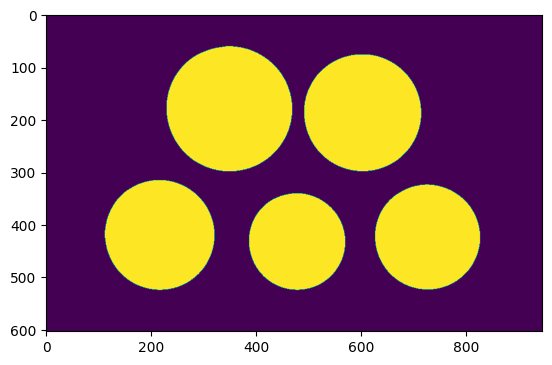

In [11]:
# Passo 2: Calcular o limiar
threshold = 250
valor, thresh = cv2.threshold(suavizada, threshold, 255, cv2.THRESH_BINARY_INV)
plt.imshow(thresh)

### Parte 2: Detecção de Contornos

A função cv2.findContours() no OpenCV é usada para detectar os contornos dos objetos em uma imagem binária. Os contornos são, essencialmente, curvas que conectam pontos contínuos de intensidade similar (como os limites de objetos), sendo muito útil em tarefas de segmentação de objetos, detecção de formas e análise de bordas.

Parâmetros: 

- `image`: A imagem binária onde os contornos serão detectados. Geralmente, é o resultado de uma limiarização (como cv2.threshold()) ou da aplicação de um detector de bordas (como o Canny).
- `mode`: Define como os contornos serão recuperados (explicado abaixo).
- `method`: Define como os pontos dos contornos serão armazenados (explicado abaixo).
- `contours`: É uma lista de contornos detectados, onde cada contorno é um array de coordenadas de pontos (x, y).
- `hierarchy`: Uma matriz que contém informações sobre a relação entre os contornos (por exemplo, se um contorno está dentro de outro).

#### Modos de Recuperação de Contornos:

- `cv2.RETR_EXTERNAL`:
    - Retorna apenas os contornos mais externos. Este modo ignora quaisquer contornos internos, sendo útil quando você só está interessado no objeto principal.
    - Exemplo: Se você tem moedas dentro de uma caixa, ele detectaria apenas a borda da caixa.
- `cv2.RETR_LIST`:
    - Retorna todos os contornos detectados, sem organizar a hierarquia. Não estabelece nenhuma relação de aninhamento entre os contornos.
- `cv2.RETR_CCOMP`:
    - Organiza todos os contornos em uma hierarquia de dois níveis: contornos externos e os contornos dos buracos (objetos internos) detectados.
- `cv2.RETR_TREE`:
    - Recupera todos os contornos e constrói uma hierarquia completa, o que significa que ele armazena as relações de aninhamento entre os contornos (pai-filho, irmão, etc.).

#### Métodos de Aproximação de Contornos

- `cv2.CHAIN_APPROX_NONE`:
	- Armazena todos os pontos do contorno, sem compressão. Se você quer manter todos os pontos ao longo do contorno, use esta opção.
- `cv2.CHAIN_APPROX_SIMPLE`:
	- Comprime segmentos horizontais, verticais e diagonais, mantendo apenas os pontos finais desses segmentos. Isso reduz o número de pontos necessários para representar o contorno, o que economiza memória.

In [12]:
# Detectar os contornos
contornos, _ = cv2.findContours(
    image=thresh, mode=cv2.RETR_EXTERNAL, method=cv2.CHAIN_APPROX_SIMPLE
)

len(contornos)

5

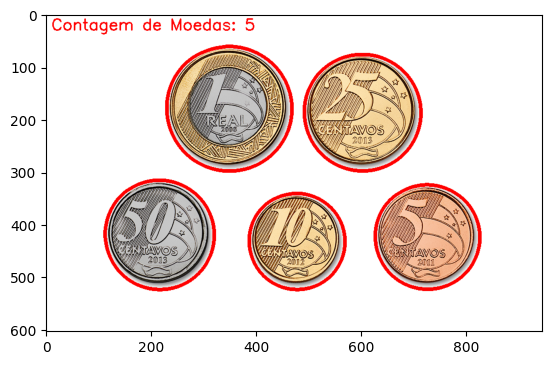

In [13]:
# Fazer uma cópia da imagem para desenhar os contornos
imagem_contornos = imagem.copy()

# Desenhar os contornos na imagem
cv2.drawContours(imagem_contornos, contornos, -1, (255, 0, 0), 5)

# Escrever na imagem o número de moedas encontradas
texto = f"Contagem de Moedas: {len(contornos)}"
cv2.putText(
    imagem_contornos,
    texto,
    (10, 30),
    cv2.FONT_HERSHEY_SIMPLEX,
    1,
    (255, 0, 0),
    2,
)

# Exibir a imagem
plt.imshow(imagem_contornos)

### Desenhando Caixas Delimitadoras Automaticamente

A função cv2.boundingRect(contorno) calcula o retângulo que encapsula o contorno especificado.

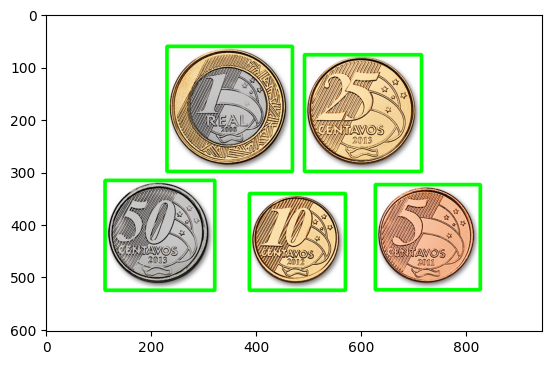

In [16]:
imagem_bbox = imagem.copy()
for contorno in contornos:
    (x, y, w, h) = cv2.boundingRect(contorno)
    cv2.rectangle(imagem_bbox, (x, y), (x + w, y + h), (0, 255, 0), 5)

plt.imshow(imagem_bbox)